In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Manual
- index: The index of the row.
- age: The age of the person.
- job: The job of the person.
- marital: The marital status of the person.
- education: The education level of the person.
- default: Whether or not the person has credit in default.
- balance: The balance of the person.
- housing: Whether or not the person has a housing loan.
- loan: Whether or not the person has a personal loan.
- contact: The contact communication type of the person.
- day: The day of the week of the last contact.
- month: The month of the year of the last contact.
- duration: The duration of the last contact, in seconds.
- campaign: The number of contacts performed during this campaign and for this client.
- pdays: The number of days that passed by after the client was last contacted from a previous campaign.
- previous: The number of contacts performed before this campaign and for this client.
- poutcome: The outcome of the previous marketing campaign.
- y: Whether or not the client has subscribed a term deposit

In [4]:
df = pd.read_csv("bank-full.csv")

In [6]:
df.columns

Index(['index,"age', 'job""', 'marital""', 'education""', 'default""',
       'balance""', 'housing""', 'loan""', 'contact""', 'day""', 'month""',
       'duration""', 'campaign""', 'pdays""', 'previous""', 'poutcome""',
       'y"""'],
      dtype='object')

In [10]:
columns = ['age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'
      ]

In [11]:
df.columns = columns

## Cleaning Data

In [30]:
df["age"] =[pd.to_numeric(x.split(",")[1][1:6]) for x in df["age"]]

In [76]:
df["job"] = df["job"].apply(lambda x : x[: -2])

In [78]:
df["marital"] = df["marital"].apply(lambda x : x[: -2])
df["education"] = df["education"].apply(lambda x : x[: -2])
df["default"] = df["default"].apply(lambda x : x[: -2])
df["housing"] = df["housing"].apply(lambda x : x[: -2])
df["loan"] = df["loan"].apply(lambda x : x[: -2])
df["contact"] = df["contact"].apply(lambda x : x[: -2])
df["month"] = df["month"].apply(lambda x : x[: -2])
df["poutcome"] = df["poutcome"].apply(lambda x : x[: -2])
df["y"] = df["y"].apply(lambda x : x[: -2])

In [81]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [82]:
job_range = np.arange(0, len(df["job"].unique()))

In [83]:
job_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [90]:
jobList = list(df["job"].unique())

In [91]:
jobListZipped = dict(zip(jobList, job_range))

In [92]:
jobListZipped

{'management': 0,
 'technician': 1,
 'entrepreneur': 2,
 'blue-collar': 3,
 'unknown': 4,
 'retired': 5,
 'admin.': 6,
 'services': 7,
 'self-employed': 8,
 'unemployed': 9,
 'housemaid': 10,
 'student': 11}

In [95]:
df["job"] = df["job"].apply(lambda x : jobListZipped[x])

In [99]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [102]:
marital = pd.get_dummies(df["marital"], drop_first=True)

In [103]:
df = pd.concat([df, marital], axis= 1)

In [106]:
df.drop("marital", axis = 1, inplace= True)

## Education

In [114]:
edu = pd.get_dummies(df["education"], drop_first=True)

In [115]:
df = pd.concat([df, edu], axis=1)

In [117]:
df.drop("education", axis=1, inplace=True)

## Default

In [119]:
df["default"].unique()

array(['no', 'yes'], dtype=object)

In [120]:
df["default"] = pd.get_dummies(df["default"], drop_first=True)

In [123]:
df["default"].unique()

array([0, 1], dtype=uint8)

## Housing/ loan

In [126]:
df["housing"] = pd.get_dummies(df["housing"], drop_first=True)

In [129]:
df["loan"] = pd.get_dummies(df["loan"], drop_first=True)

### Contact

In [131]:
df["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [134]:
contact = pd.get_dummies(df["contact"], drop_first=True)

In [135]:
df = pd.concat([df, contact], axis=1)

In [137]:
df.drop("contact", axis=1, inplace=True)

## month

In [140]:
df["month"].nunique()

12

In [153]:
monthDict = {'may': 5,
 'jun': 6,
 'jul': 7,
 'aug': 8,
 'oct': 10,
 'nov': 11,
 'dec': 12,
 'jan': 1,
 'feb': 2,
 'mar': 3,
 'apr': 4,
 'sep': 9}

In [156]:
df.tail(4)

,age,job,default,balance,housing,loan,day,month,duration,campaign,...,previous,poutcome,y,married,single,secondary,tertiary,unknown,telephone,unknown
45207,71,5,0,1729,0,0,17,nov,456,2,...,0,unknown,"yes""",0,0,0,0,0,0,0
45208,72,5,0,5715,0,0,17,nov,1127,5,...,3,success,"yes""",1,0,1,0,0,0,0
45209,57,3,0,668,0,0,17,nov,508,4,...,0,unknown,"no""",1,0,1,0,0,1,0
45210,37,2,0,2971,0,0,17,nov,361,2,...,11,other,"no""",1,0,1,0,0,0,0


In [157]:
df["month"] = df["month"].apply(lambda x: monthDict[x])

In [159]:
df.columns

Index(['age', 'job', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'married',
       'single', 'secondary', 'tertiary', 'unknown', 'telephone', 'unknown'],
      dtype='object')

In [160]:
df.head()

,age,job,default,balance,housing,loan,day,month,duration,campaign,...,previous,poutcome,y,married,single,secondary,tertiary,unknown,telephone,unknown
0,58,0,0,2143,1,0,5,5,261,1,...,0,unknown,"no""",1,0,0,1,0,0,1
1,44,1,0,29,1,0,5,5,151,1,...,0,unknown,"no""",0,1,1,0,0,0,1
2,33,2,0,2,1,1,5,5,76,1,...,0,unknown,"no""",1,0,1,0,0,0,1
3,47,3,0,1506,1,0,5,5,92,1,...,0,unknown,"no""",1,0,0,0,1,0,1
4,33,4,0,1,0,0,5,5,198,1,...,0,unknown,"no""",0,1,0,0,1,0,1


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  int64 
 2   default    45211 non-null  uint8 
 3   balance    45211 non-null  int64 
 4   housing    45211 non-null  uint8 
 5   loan       45211 non-null  uint8 
 6   day        45211 non-null  int64 
 7   month      45211 non-null  int64 
 8   duration   45211 non-null  int64 
 9   campaign   45211 non-null  int64 
 10  pdays      45211 non-null  int64 
 11  previous   45211 non-null  int64 
 12  poutcome   45211 non-null  object
 13  y          45211 non-null  object
 14  married    45211 non-null  uint8 
 15  single     45211 non-null  uint8 
 16  secondary  45211 non-null  uint8 
 17  tertiary   45211 non-null  uint8 
 18  unknown    45211 non-null  uint8 
 19  telephone  45211 non-null  uint8 
 20  unknown    45211 non-null  u

## Poutcome

In [164]:
df["poutcome"].nunique()

4

In [167]:
poutcom = pd.get_dummies(df["poutcome"], drop_first=True)

In [168]:
df = pd.concat([df, poutcom], axis=1)

In [171]:
df.drop("poutcome", axis=1, inplace=True)

In [173]:
df["y"]

0         no"
1         no"
2         no"
3         no"
4         no"
         ... 
45206    yes"
45207    yes"
45208    yes"
45209     no"
45210     no"
Name: y, Length: 45211, dtype: object

In [178]:
df["y"] = df["y"].apply(lambda x : x[: -1])

In [181]:
df["y"].nunique()

2

In [182]:
df["y"] = pd.get_dummies(df["y"], drop_first=True)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   default    45211 non-null  uint8
 3   balance    45211 non-null  int64
 4   housing    45211 non-null  uint8
 5   loan       45211 non-null  uint8
 6   day        45211 non-null  int64
 7   month      45211 non-null  int64
 8   duration   45211 non-null  int64
 9   campaign   45211 non-null  int64
 10  pdays      45211 non-null  int64
 11  previous   45211 non-null  int64
 12  y          45211 non-null  uint8
 13  married    45211 non-null  uint8
 14  single     45211 non-null  uint8
 15  secondary  45211 non-null  uint8
 16  tertiary   45211 non-null  uint8
 17  unknown    45211 non-null  uint8
 18  telephone  45211 non-null  uint8
 19  unknown    45211 non-null  uint8
 20  other      45211 non-null  uint8
 21  success    4

## Target will be "y" column 
- indicating yes or no for subscribing

In [193]:
df.corrwith(df['y']).sort_values(ascending = False)

y            1.000000
duration     0.394521
success      0.306788
pdays        0.103621
previous     0.093236
tertiary     0.066448
single       0.063526
balance      0.052838
other        0.031955
age          0.025155
job          0.022396
month        0.018717
telephone    0.014042
unknown      0.012053
default     -0.022419
day         -0.028348
secondary   -0.036388
married     -0.060260
loan        -0.068185
campaign    -0.073172
housing     -0.139173
unknown     -0.150935
unknown     -0.167051
dtype: float64

<AxesSubplot:>

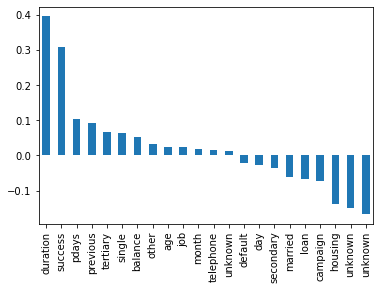

In [192]:
df.corrwith(df['y']).sort_values(ascending = False)[1:].plot(kind = "bar")

,age,job,default,balance,housing,loan,day,month,duration,campaign,...,married,single,secondary,tertiary,unknown,telephone,unknown,other,success,unknown
0,58,0,0,2143,1,0,5,5,261,1,...,1,0,0,1,0,0,1,0,0,1
1,44,1,0,29,1,0,5,5,151,1,...,0,1,1,0,0,0,1,0,0,1
2,33,2,0,2,1,1,5,5,76,1,...,1,0,1,0,0,0,1,0,0,1
3,47,3,0,1506,1,0,5,5,92,1,...,1,0,0,0,1,0,1,0,0,1
4,33,4,0,1,0,0,5,5,198,1,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,825,0,0,17,11,977,3,...,1,0,0,1,0,0,0,0,0,1
45207,71,5,0,1729,0,0,17,11,456,2,...,0,0,0,0,0,0,0,0,0,1
45208,72,5,0,5715,0,0,17,11,1127,5,...,1,0,1,0,0,0,0,0,1,0
45209,57,3,0,668,0,0,17,11,508,4,...,1,0,1,0,0,1,0,0,0,1


In [195]:
df

,age,job,default,balance,housing,loan,day,month,duration,campaign,...,married,single,secondary,tertiary,unknown,telephone,unknown,other,success,unknown
0,58,0,0,2143,1,0,5,5,261,1,...,1,0,0,1,0,0,1,0,0,1
1,44,1,0,29,1,0,5,5,151,1,...,0,1,1,0,0,0,1,0,0,1
2,33,2,0,2,1,1,5,5,76,1,...,1,0,1,0,0,0,1,0,0,1
3,47,3,0,1506,1,0,5,5,92,1,...,1,0,0,0,1,0,1,0,0,1
4,33,4,0,1,0,0,5,5,198,1,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,825,0,0,17,11,977,3,...,1,0,0,1,0,0,0,0,0,1
45207,71,5,0,1729,0,0,17,11,456,2,...,0,0,0,0,0,0,0,0,0,1
45208,72,5,0,5715,0,0,17,11,1127,5,...,1,0,1,0,0,0,0,0,1,0
45209,57,3,0,668,0,0,17,11,508,4,...,1,0,1,0,0,1,0,0,0,1


<AxesSubplot:>

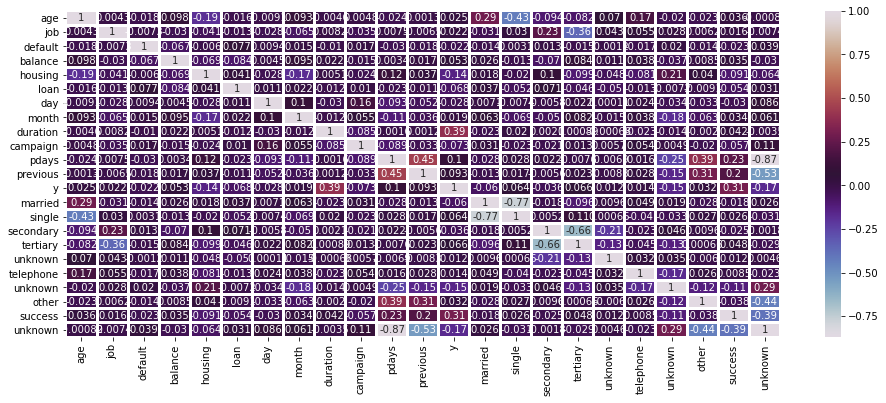

In [204]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot= True, cmap="twilight", linecolor = "white", linewidths=2 )

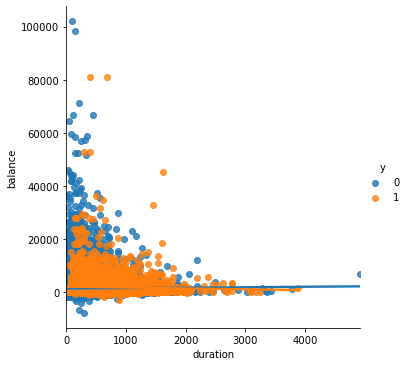

In [207]:
sns.lmplot(x = "duration", y = "balance", data = df, hue="y")

## unbalanced

In [209]:
df.head(3)

,age,job,default,balance,housing,loan,day,month,duration,campaign,...,married,single,secondary,tertiary,unknown,telephone,unknown,other,success,unknown
0,58,0,0,2143,1,0,5,5,261,1,...,1,0,0,1,0,0,1,0,0,1
1,44,1,0,29,1,0,5,5,151,1,...,0,1,1,0,0,0,1,0,0,1
2,33,2,0,2,1,1,5,5,76,1,...,1,0,1,0,0,0,1,0,0,1


<AxesSubplot:xlabel='y', ylabel='count'>

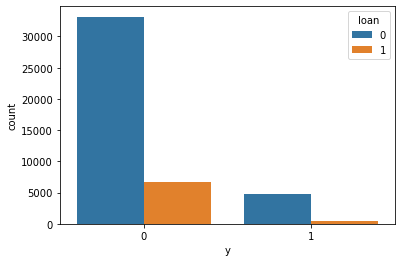

In [211]:
sns.countplot(x = df["y"], hue="loan", data = df)

<AxesSubplot:xlabel='job', ylabel='age'>

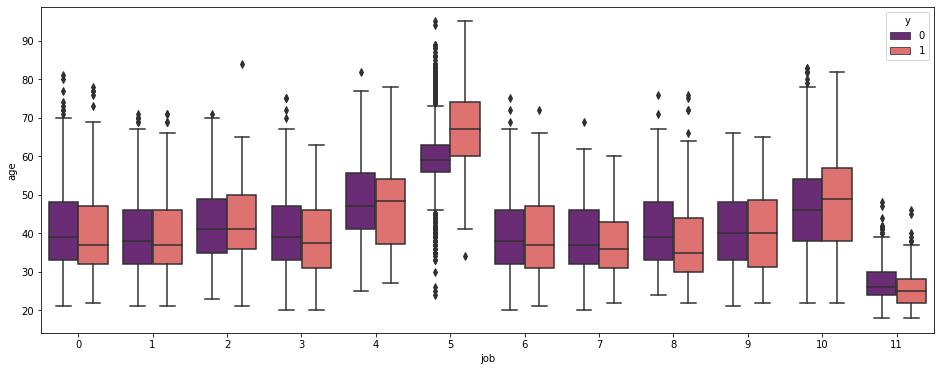

In [217]:
plt.figure(figsize=(16,6))
sns.boxplot(x = "job", y = "age", data = df, palette="magma", hue="y")

In [215]:
jobListZipped

{'management': 0,
 'technician': 1,
 'entrepreneur': 2,
 'blue-collar': 3,
 'unknown': 4,
 'retired': 5,
 'admin.': 6,
 'services': 7,
 'self-employed': 8,
 'unemployed': 9,
 'housemaid': 10,
 'student': 11}

## Preparing model

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
X = df.drop("y", axis=1)
y = df["y"]

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## model creation

In [224]:
from sklearn.linear_model import LogisticRegression

In [227]:
model = LogisticRegression(n_jobs=200)

In [228]:
model.fit(X_train, y_train)

LogisticRegression(n_jobs=200)

## Predictions

In [229]:
model.intercept_

array([-0.12428888])

In [230]:
model.coef_

array([[-2.61869133e-02,  3.37432642e-02, -8.20970509e-03,
         3.25333119e-05, -3.23013043e-01, -8.55961673e-02,
        -1.42067643e-02, -1.03704771e-01,  3.37862790e-03,
        -3.80530979e-01, -3.80506318e-04,  1.53648573e-01,
        -8.54712342e-02, -4.89521401e-02, -1.17242345e-01,
         1.96254809e-02,  5.18967072e-03,  2.67988972e-02,
        -2.10823045e-01, -9.25168061e-03,  1.43999588e-01,
        -2.04332879e-01]])

In [231]:
pred = model.predict(X_test)

In [233]:
from sklearn.metrics import confusion_matrix, classification_report, explained_variance_score

In [234]:
print(explained_variance_score(pred, y_test))

-157383.12521228383


In [235]:
print(confusion_matrix(y_test, pred))

[[11742   224]
 [ 1313   285]]


In [236]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.56      0.18      0.27      1598

    accuracy                           0.89     13564
   macro avg       0.73      0.58      0.60     13564
weighted avg       0.86      0.89      0.86     13564

